<img src = excelrlogo.png/>

### ASSIGNMENT-17--SUPPORT VECTOR MACHINE

#### PROBLEM STATEMENT -- svm_SalaryData_Test & svm_SalaryData_Train

#### LIBRARIES

In [2]:
import numpy as np
import pandas as pd

#### Load Train and Test Dataset

In [3]:
svm_SalaryData_Train = pd.read_csv('SalaryData_Train.csv')
svm_SalaryData_Test = pd.read_csv('SalaryData_Test.csv')

In [4]:
svm_SalaryData_Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### EDA

In [5]:
print(svm_SalaryData_Train.shape)
print(svm_SalaryData_Test.shape)

(30161, 14)
(15060, 14)


In [6]:
svm_SalaryData_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
svm_SalaryData_Train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
svm_SalaryData_Train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

#### Data Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

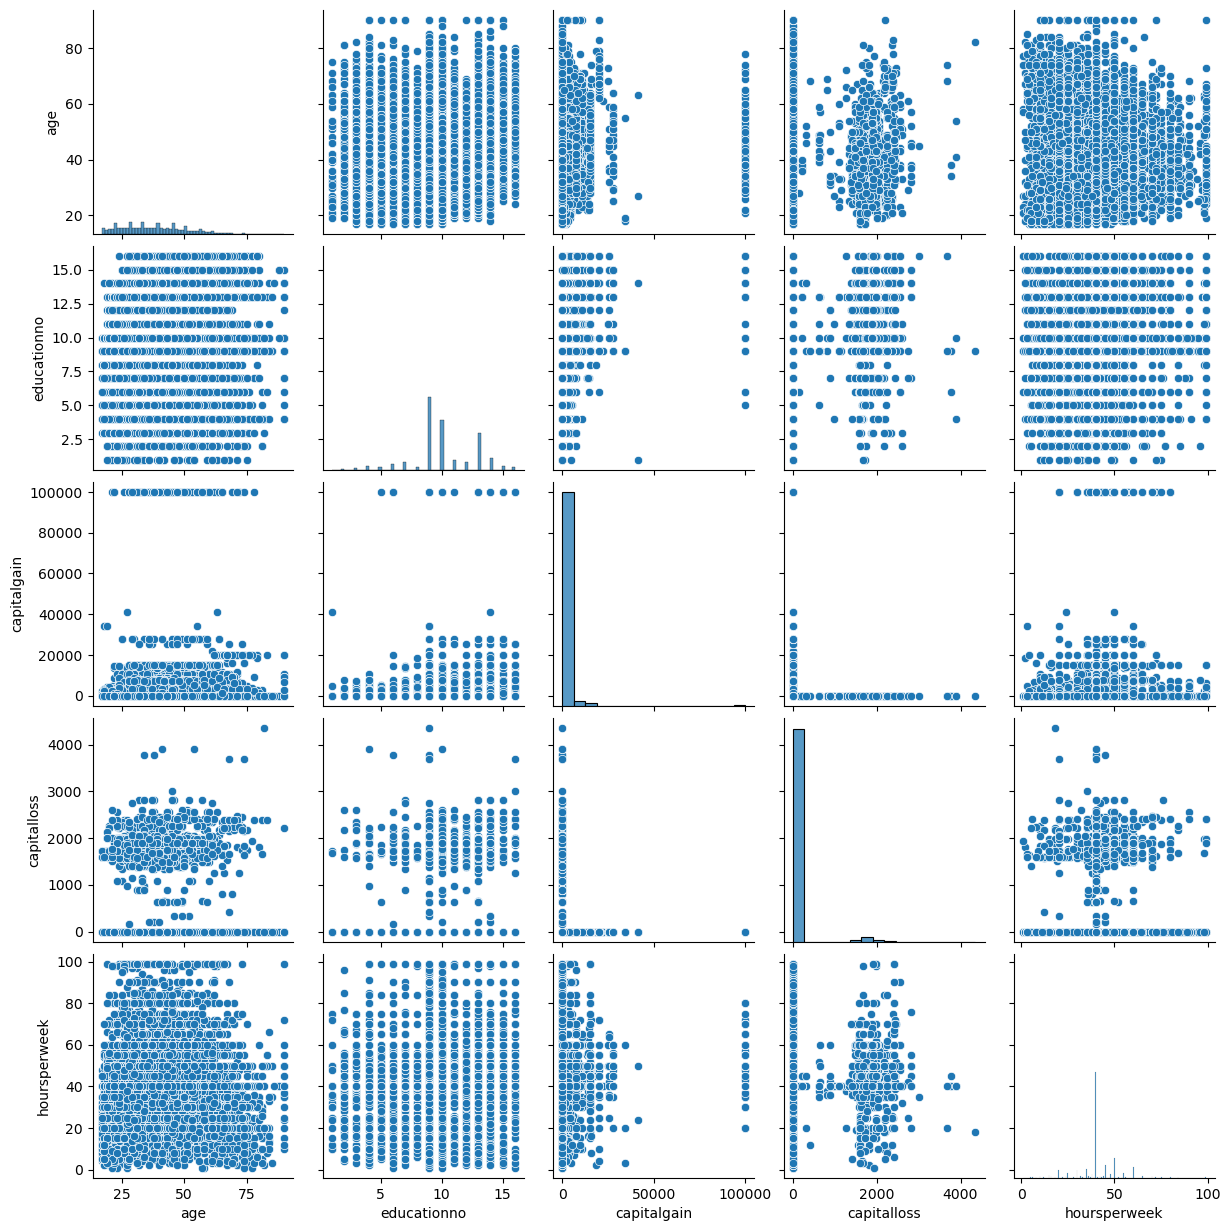

In [10]:
sns.pairplot(svm_SalaryData_Train)
plt.show()

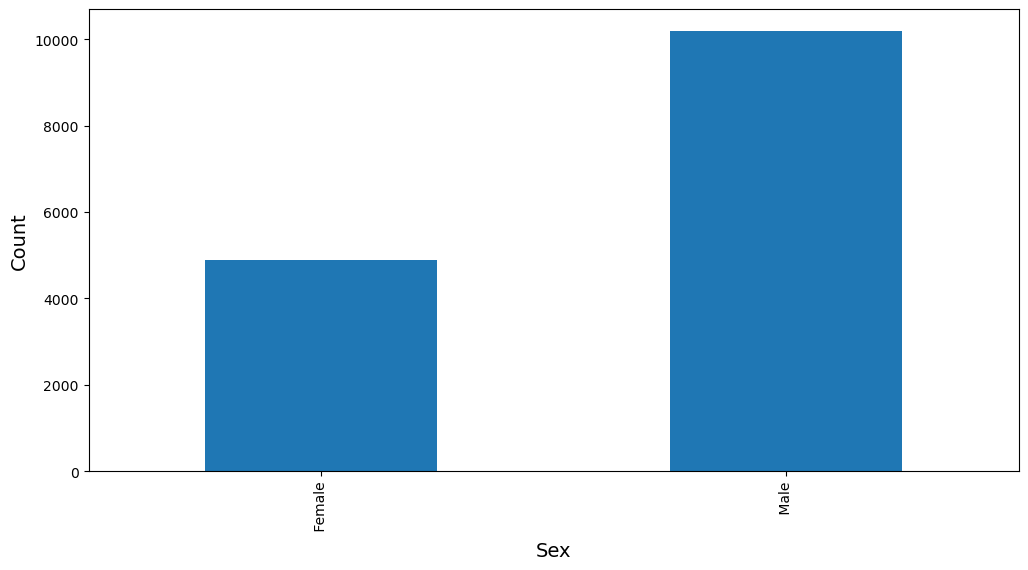

In [11]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(svm_SalaryData_Train['Salary'],svm_SalaryData_Train['sex']).mean().plot(kind='bar')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

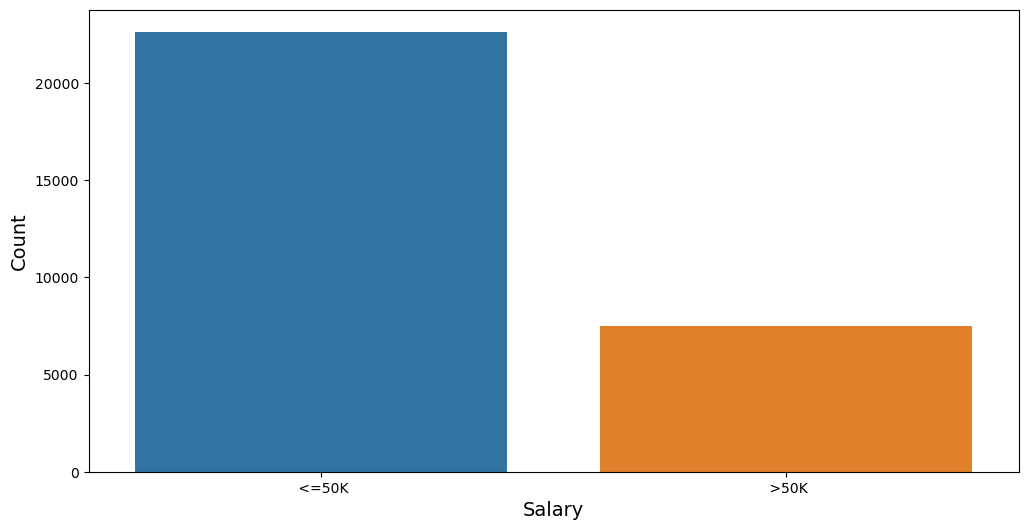

In [12]:
plt.rcParams["figure.figsize"] = (12,6)
sns.countplot(x='Salary', data= svm_SalaryData_Train)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Text(0, 0.5, 'Count')

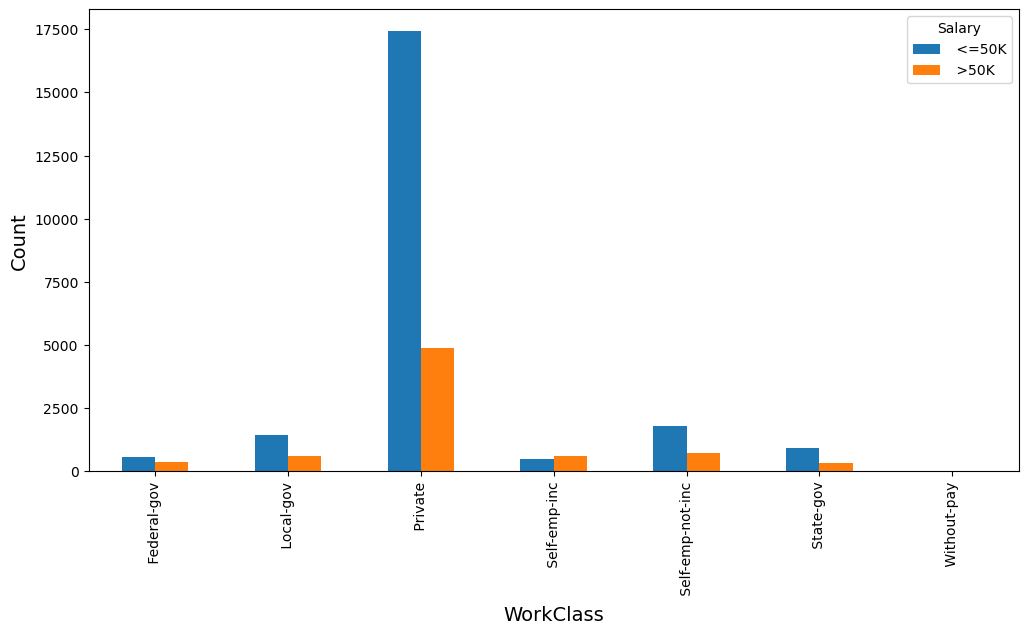

In [13]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(svm_SalaryData_Train.workclass,svm_SalaryData_Train.Salary).plot(kind="bar")
plt.xlabel('WorkClass', fontsize=14)
plt.ylabel('Count', fontsize=14)

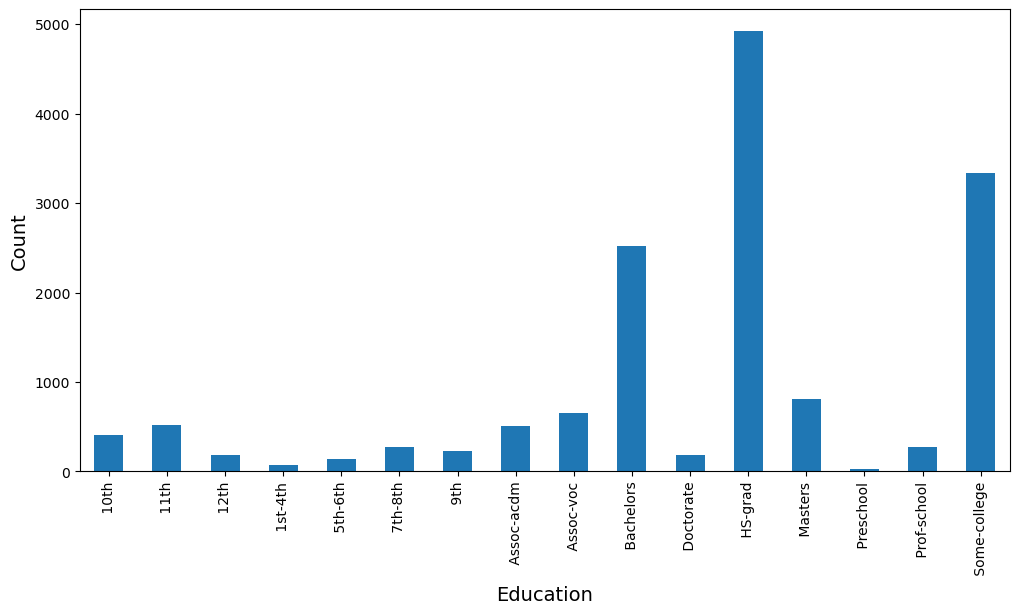

In [14]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(svm_SalaryData_Train['Salary'],svm_SalaryData_Train['education']).mean().plot(kind='bar')
plt.xlabel('Education', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

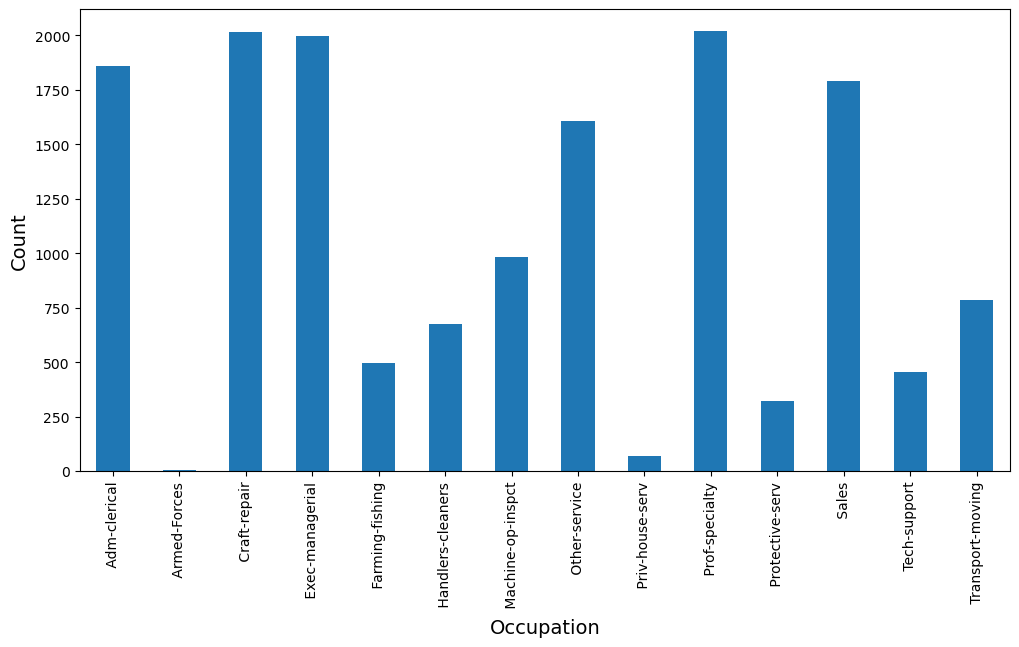

In [15]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(svm_SalaryData_Train['Salary'],svm_SalaryData_Train['occupation']).mean().plot(kind='bar')
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

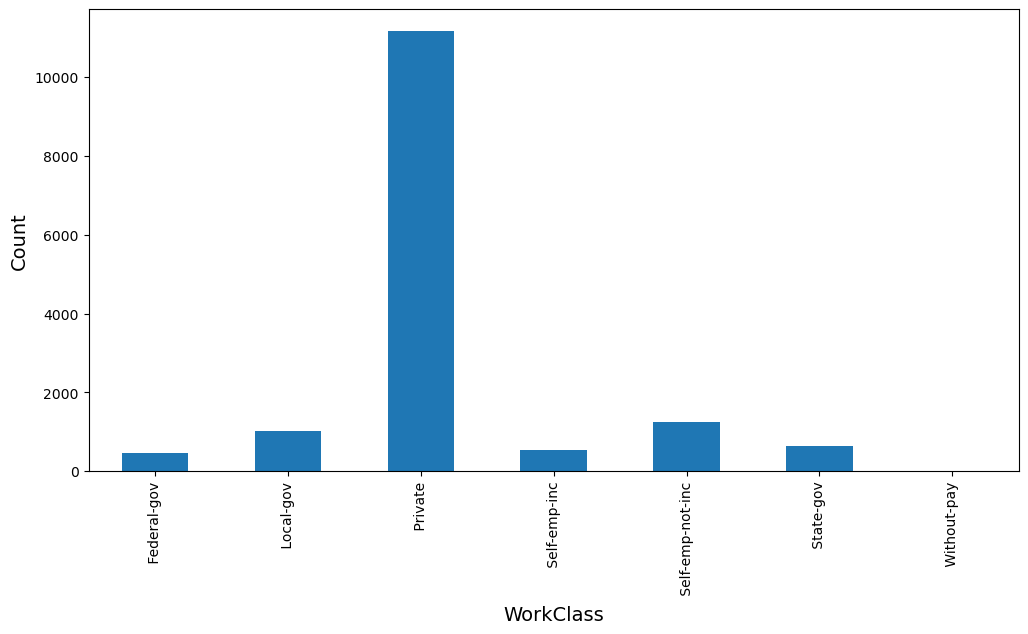

In [16]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(svm_SalaryData_Train['Salary'],svm_SalaryData_Train['workclass']).mean().plot(kind='bar')
plt.xlabel('WorkClass', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

C:\Users\gk521\AppData\Local\Temp\ipykernel_12896\2954450521.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = svm_SalaryData_Train.corr()


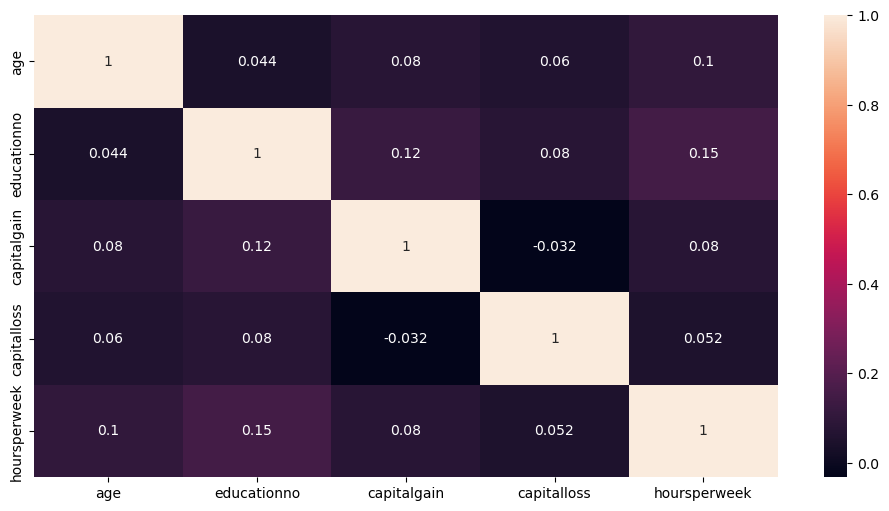

In [17]:
corr = svm_SalaryData_Train.corr()
sns.heatmap(corr, annot=True)
plt.show()

#### Outliers Detection

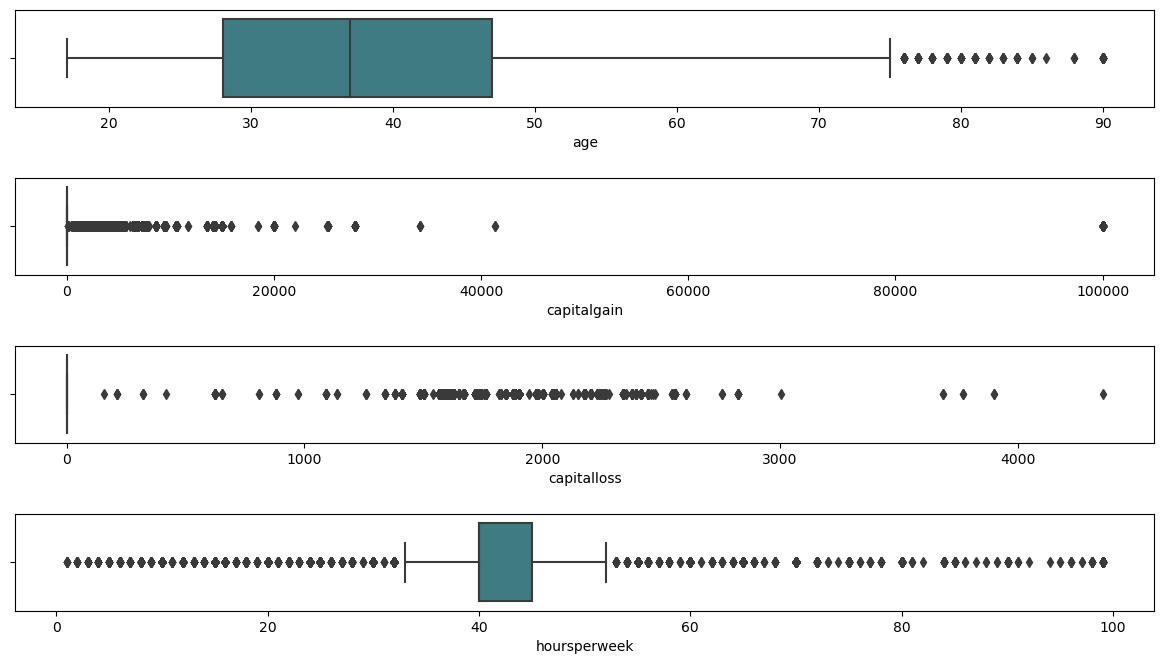

In [18]:
outlier1 = svm_SalaryData_Train.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

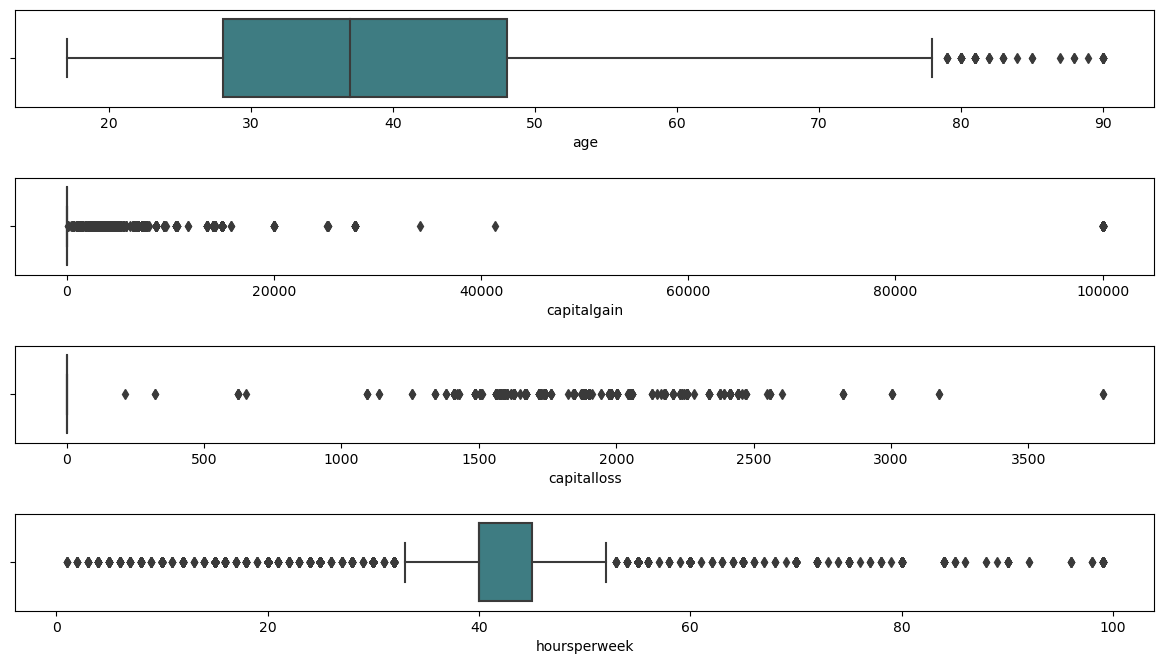

In [19]:
outlier2 = svm_SalaryData_Test.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier2,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier2,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier2,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier2,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

#### Data Preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()
svm_SalaryData_Train['workclass']=le.fit_transform(svm_SalaryData_Train['workclass'])
svm_SalaryData_Train['education']=le.fit_transform(svm_SalaryData_Train['education'])
svm_SalaryData_Train['maritalstatus']=le.fit_transform(svm_SalaryData_Train['maritalstatus'])
svm_SalaryData_Train['occupation']=le.fit_transform(svm_SalaryData_Train['occupation'])
svm_SalaryData_Train['relationship']=le.fit_transform(svm_SalaryData_Train['relationship'])
svm_SalaryData_Train['race']=le.fit_transform(svm_SalaryData_Train['race'])
svm_SalaryData_Train['sex']=le.fit_transform(svm_SalaryData_Train['sex'])
svm_SalaryData_Train['native']=le.fit_transform(svm_SalaryData_Train['native'])
svm_SalaryData_Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [23]:
svm_SalaryData_Train['Salary']=[0 if i.strip()=='<=50K' else 1 for i in svm_SalaryData_Train['Salary']]

In [24]:
svm_SalaryData_Test['workclass']=le.fit_transform(svm_SalaryData_Test['workclass'])
svm_SalaryData_Test['education']=le.fit_transform(svm_SalaryData_Test['education'])
svm_SalaryData_Test['maritalstatus']=le.fit_transform(svm_SalaryData_Test['maritalstatus'])
svm_SalaryData_Test['occupation']=le.fit_transform(svm_SalaryData_Test['occupation'])
svm_SalaryData_Test['relationship']=le.fit_transform(svm_SalaryData_Test['relationship'])
svm_SalaryData_Test['race']=le.fit_transform(svm_SalaryData_Test['race'])
svm_SalaryData_Test['sex']=le.fit_transform(svm_SalaryData_Test['sex'])
svm_SalaryData_Test['native']=le.fit_transform(svm_SalaryData_Test['native'])
svm_SalaryData_Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [25]:
svm_SalaryData_Test['Salary']=[0 if i.strip()=='<=50K' else 1 for i in svm_SalaryData_Test['Salary']]

#### Model Building

In [26]:
X_train = svm_SalaryData_Train.drop(['Salary'],axis=1)
y_train = svm_SalaryData_Train[['Salary']]

X_test = svm_SalaryData_Test.drop(['Salary'],axis=1)
y_test = svm_SalaryData_Test[['Salary']]

In [27]:
print('X_train Shape :', X_train.shape)
print('y_train Shape :', y_train.shape)
print('X_test Shape  :', X_test.shape)
print('y_test Shape  :', y_test.shape)

X_train Shape : (30161, 13)
y_train Shape : (30161, 1)
X_test Shape  : (15060, 13)
y_test Shape  : (15060, 1)


#### Model Training | Testing | Evaluation - SVM Model

In [29]:
from sklearn.svm import SVC

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
%%time
svc = SVC()
svc.fit(X_train, y_train)

CPU times: total: 20.8 s
Wall time: 39.6 s


SVC()

In [33]:
%%time
y_pred = svc.predict(X_test)

CPU times: total: 18.4 s
Wall time: 35 s


In [35]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [36]:
print(confusion_matrix(y_test, y_pred))

[[10997   363]
 [ 2703   997]]


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060



In [38]:
svc.score(X_train, y_train)

0.7960279831570571

In [39]:
svc.score(X_test, y_test)

0.7964143426294821

#### Handling Imbalance Data

In [40]:
svm_SalaryData_Train['Salary'].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [44]:
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)

In [45]:
X_resampled

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45301,58,1,15,10,2,6,0,2,1,7298,0,40,37
45302,46,2,15,10,2,3,0,4,1,0,0,40,37
45303,53,4,12,14,1,9,0,4,1,0,0,50,37
45304,50,1,12,14,2,9,0,4,1,7688,0,45,37


In [46]:
y_resampled

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
45301,1
45302,1
45303,1
45304,1


In [47]:
y_resampled.value_counts()

Salary
0         22653
1         22653
dtype: int64

In [48]:
%%time
svc = SVC(C=2,gamma=0.01)
svc.fit(X_resampled,y_resampled)

CPU times: total: 2min 42s
Wall time: 5min 12s


SVC(C=2, gamma=0.01)

In [49]:
%%time
y_pred=svc.predict(X_test)

CPU times: total: 31.4 s
Wall time: 1min 3s


In [50]:
print(confusion_matrix(y_test,y_pred))

[[9284 2076]
 [ 659 3041]]


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     11360
           1       0.59      0.82      0.69      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.82      0.78     15060
weighted avg       0.85      0.82      0.83     15060



In [52]:
svc.score(X_resampled,y_resampled)

0.8703041539751909

In [53]:
svc.score(X_test,y_test)

0.8183930942895087

#### Feature Selection

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2

In [55]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 7927.146247
Feature 1: 4.061261
Feature 2: 264.815807
Feature 3: 2178.317438
Feature 4: 982.227659
Feature 5: 218.597378
Feature 6: 3435.382731
Feature 7: 29.339535
Feature 8: 459.219298
Feature 9: 74124662.376269
Feature 10: 1258785.769299
Feature 11: 5569.194066
Feature 12: 16.707320


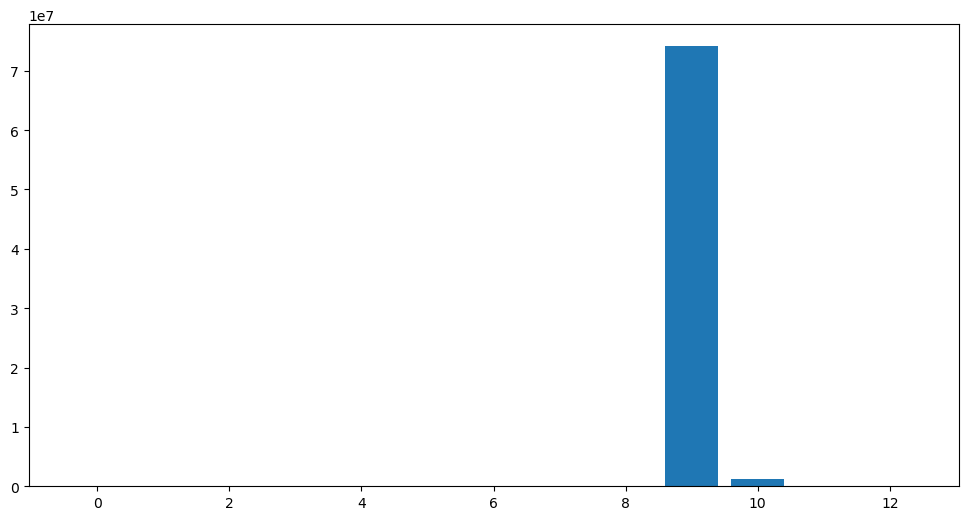

In [57]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### Features 1,2,5,7,8,12 are not highly relevant

In [56]:
svm_SalaryData_Train_copy = svm_SalaryData_Train.copy()
svm_SalaryData_Train_copy.drop(svm_SalaryData_Train_copy.columns[[1,2,5,7,8,12]],axis=1,inplace=True)
svm_SalaryData_Train_copy

,age,educationno,maritalstatus,relationship,capitalgain,capitalloss,hoursperweek,Salary
0,39,13,4,1,2174,0,40,0
1,50,13,2,0,0,0,13,0
2,38,9,0,1,0,0,40,0
3,53,7,2,0,0,0,40,0
4,28,13,2,5,0,0,40,0
...,...,...,...,...,...,...,...,...
30156,27,12,2,5,0,0,38,0
30157,40,9,2,0,0,0,40,1
30158,58,9,6,4,0,0,40,0
30159,22,9,4,3,0,0,20,0


In [58]:
X_train = svm_SalaryData_Train_copy.drop(['Salary'],axis=1)
y_train = svm_SalaryData_Train_copy[['Salary']]

In [61]:
svm_SalaryData_Test_copy = svm_SalaryData_Test.copy()
svm_SalaryData_Test_copy.drop(svm_SalaryData_Test_copy.columns[[1,2,5,7,8,12]],axis=1,inplace=True)
svm_SalaryData_Test_copy

,age,educationno,maritalstatus,relationship,capitalgain,capitalloss,hoursperweek,Salary
0,25,7,4,3,0,0,40,0
1,38,9,2,0,0,0,50,0
2,28,12,2,0,0,0,40,1
3,44,10,2,0,7688,0,40,1
4,34,6,4,1,0,0,30,0
...,...,...,...,...,...,...,...,...
15055,33,13,4,3,0,0,40,0
15056,39,13,0,1,0,0,36,0
15057,38,13,2,0,0,0,50,0
15058,44,13,0,3,5455,0,40,0


In [62]:
X_test = svm_SalaryData_Test_copy.drop(['Salary'],axis=1)
y_test = svm_SalaryData_Test_copy[['Salary']]

#### Model Training with Highly Relevant Features

In [63]:
%%time
svc=SVC(C=3.0, kernel='rbf', gamma=0.01, random_state=10)
svc.fit(X_train,y_train)

CPU times: total: 1min 3s
Wall time: 1min 34s


SVC(C=3.0, gamma=0.01, random_state=10)

In [64]:
%%time
y_pred=svc.predict(X_test)

CPU times: total: 28.1 s
Wall time: 44 s


In [65]:
print(confusion_matrix(y_test,y_pred))

[[10930   430]
 [ 1708  1992]]


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     11360
           1       0.82      0.54      0.65      3700

    accuracy                           0.86     15060
   macro avg       0.84      0.75      0.78     15060
weighted avg       0.85      0.86      0.85     15060



In [67]:
svc.score(X_train,y_train)

0.8616093630847783

In [68]:
svc.score(X_test,y_test)

0.8580345285524569

### Conclusion

- We have successfully built and evaluated SVM models for two classification problems: one involving forest fire data and another involving salary data. We have performed data preprocessing, handled class imbalance, and selected relevant features to improve model performance. The final SVM model with highly relevant features showed promising results in classifying salary data.

+ The effectiveness of a model also depends on the specific characteristics of the dataset and the problem at hand. Further fine-tuning and experimentation may be needed to achieve the best possible results.

### Thank You!